## Laboratorio 1 
### Visión por computadora

#### Jonathan Espinoza 20022
#### Juan Fernando Ramirez 20666
#### Juan Andres Galicia 20298
#### Oscar Mendez 20402

# Operador Hit or Miss

El operador **Hit or Miss** es una técnica en el procesamiento de imágenes que se usa para encontrar formas específicas dentro de una imagen binaria.

Para hacer esto, el operador utiliza dos elementos estructurantes:

- Uno para la figura que quieres encontrar (el "hit").
- Otro para asegurarse de que el espacio alrededor de esa figura esté vacío (el "miss").

## Funcionamiento del Operador Hit or Miss:

1. **Definición de Elementos Estructurantes**: Para aplicar el operador Hit or Miss, se necesitan dos elementos estructurantes complementarios. El primero corresponde al patrón que se busca detectar, y el segundo define el fondo que debe rodear al patrón para considerarse un miss.

2. **Aplicación de la Erosión**: La operación de Hit or Miss se basa en aplicar la erosión de manera independiente con ambos elementos estructurantes. La erosión con el primer elemento estructurante busca las regiones de la imagen donde el patrón puede insertarse completamente. Paralelamente, la erosión con el segundo elemento estructurante se aplica a la imagen complementaria para identificar las áreas donde el contexto del patrón está ausente.

3. **Intersección de Resultados**: El paso final es realizar la intersección de los resultados de las dos erosiones anteriores. Solo las áreas que fueron erosionadas exitosamente en ambos casos sobrevivirán a esta intersección, marcando la ubicación exacta de los patrones buscados.

## Construcción de \(A O B\) a partir de Operaciones Básicas:

La operación \(A \ast B\), que representa el operador Hit or Miss, no se construye directamente a partir de dilataciones, aperturas, cierres o diferencias de manera evidente, sino que se basa principalmente en la erosión aplicada de forma separada a la imagen y a su complemento con dos elementos estructurantes diferentes. 

- **Erosión**: Es la operación principal utilizada, aplicada tanto a la imagen original como a su complemento con diferentes elementos estructurantes.


- **Dilatación**: Aumenta el tamaño de los objetos en la imagen. Puede utilizarse para cerrar pequeños espacios o huecos dentro de los objetos de interés, lo que facilita su detección como una estructura.

- **Apertura (Opening)**: Es una combinación de erosión seguida de dilatación. Esta operación es excelente para eliminar ruido y pequeños objetos del fondo, mientras mantiene la forma general y el tamaño de los objetos más grandes.

- **Cierre (Closing)**: Consiste en una dilatación seguida de una erosión. Esta operación es útil para cerrar pequeños huecos dentro de los objetos y suavizar los contornos. 


- **diferencia**: Esta operación permite comparar la imagen original con el resultado después de aplicar Hit or Miss, destacando así los cambios o identificando los patrones detectados. Al utilizar la diferencia, podemos:

- Resaltar específicamente los patrones encontrados por el operador Hit or Miss, facilitando su análisis visual o cuantitativo.
- Eliminar de la imagen original aquellos patrones detectados, si el objetivo es limpiar la imagen de ciertos elementos.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

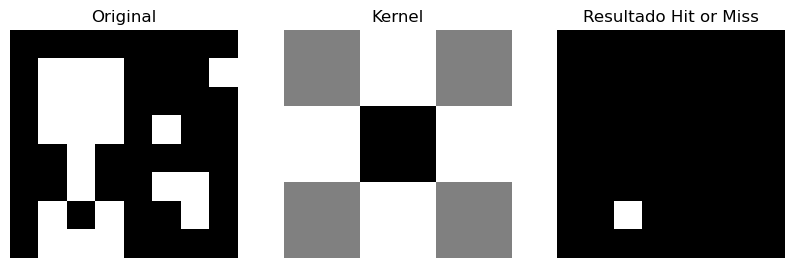

In [3]:
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0, 255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")
kernel = np.array((
    [0, 1, 0],
    [1, -1, 1],
    [0, 1, 0]), dtype="int")

output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)

kernel_display = (kernel + 1) * 127
kernel_display = np.uint8(kernel_display)

plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.imshow(input_image, cmap='gray', interpolation='nearest')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(kernel_display, cmap='gray', interpolation='nearest')
plt.title('Kernel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output_image, cmap='gray', interpolation='nearest')
plt.title('Resultado Hit or Miss')
plt.axis('off')

plt.show()


#### 2. Invertir y binarizar la imagen fingerprint.jpeg a continuación. Luego, aplicar transformaciones morfológicas adecuadas para remover y restaurar la imagen.
<img src="fingerprint.jpeg" width="200" alt="Fingerprint">



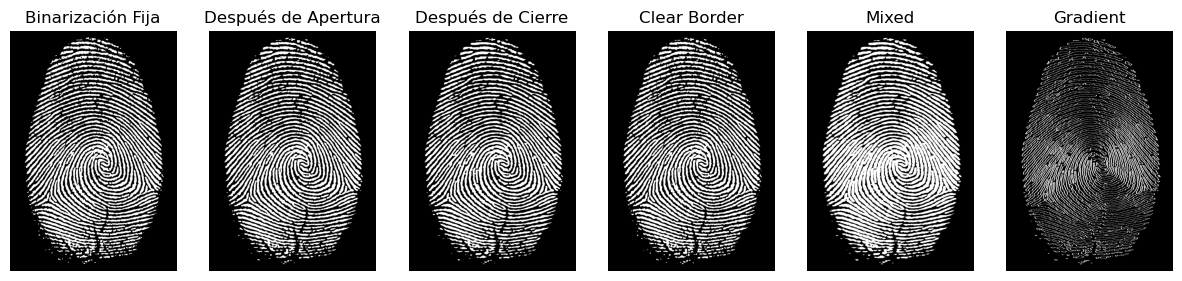

In [5]:
def plot_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(image, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

kernel_size = 6
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))

kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (6, 2))

fingerprint_image = cv2.imread('fingerprint.jpeg', cv2.IMREAD_GRAYSCALE)

inverted_fingerprint = 255 - fingerprint_image

_, fixed_thresh_fingerprint = cv2.threshold(inverted_fingerprint, 128, 255, cv2.THRESH_BINARY)

restored_opening_fixed = cv2.morphologyEx(fixed_thresh_fingerprint, cv2.MORPH_OPEN, kernel)

restored_closing_fixed = cv2.morphologyEx(restored_opening_fixed, cv2.MORPH_CLOSE, kernel)

clearborder_image = 255 - restored_closing_fixed.copy()

h, w = clearborder_image.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
for row in range(0, h, h-1):
    for col in range(0, w, w-1):
        if clearborder_image[row, col] == 0:
            cv2.floodFill(clearborder_image, mask, (col,row), 255)
clearborder_image = 255 - clearborder_image

restored_opening_fixed = cv2.morphologyEx(clearborder_image, cv2.MORPH_OPEN, kernel2)
restored_closing_fixed = cv2.morphologyEx(restored_opening_fixed, cv2.MORPH_CLOSE, kernel2)

gradient = cv2.morphologyEx(restored_closing_fixed, cv2.MORPH_GRADIENT, kernel2)

gradient = cv2.normalize(gradient, None, 0, 255, cv2.NORM_MINMAX)
restored_closing_fixed = cv2.normalize(restored_closing_fixed, None, 0, 255, cv2.NORM_MINMAX)
mixed_image = cv2.addWeighted(restored_closing_fixed, 1, gradient, 200, 100)

plot_images([fixed_thresh_fingerprint, restored_opening_fixed, restored_closing_fixed, clearborder_image, mixed_image, gradient], 
            ['Binarización Fija', 'Después de Apertura', 'Después de Cierre', 'Clear Border', 'Mixed','Gradient'])



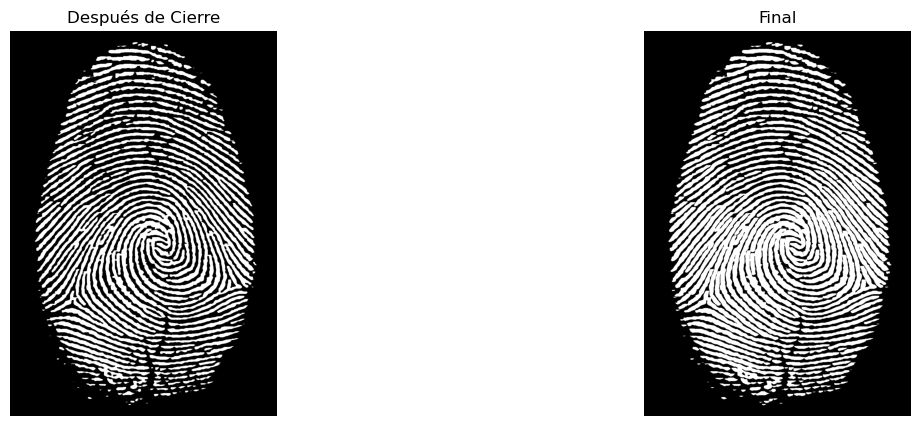

In [6]:
plot_images([restored_closing_fixed, mixed_image], 
            ['Después de Cierre', 'Final'])